In [2]:
# Importint All Libraties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter("ignore")

In [4]:
# Step -1 Read The dataset

In [5]:
df = pd.read_csv('daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
# Setp-2  EDA

In [7]:
data = df.copy()

In [8]:
# Getting the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [9]:
# Checkign the null value
df.isnull().sum()

Date    0
Temp    0
dtype: int64

In [10]:
# Gettting the descriptive analysis of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,3650.0,11.177753,4.071837,0.0,8.3,11.0,14.0,26.3


In [11]:
# Changing the data type of data from object ot datatime

In [12]:
from datetime import datetime

In [13]:
df["Date"] = pd.to_datetime(df["Date"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [15]:
# Indexing our dataset


In [16]:
# Getting index from dataset
df.index

RangeIndex(start=0, stop=3650, step=1)

In [17]:
# to add index the index
df.set_index("Date", drop=True)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [18]:
# Resampling
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [19]:
df.head()

,Date,Temp,Year,Month,Day
0,1981-01-01,20.7,1981,1,1
1,1981-01-02,17.9,1981,1,2
2,1981-01-03,18.8,1981,1,3
3,1981-01-04,14.6,1981,1,4
4,1981-01-05,15.8,1981,1,5


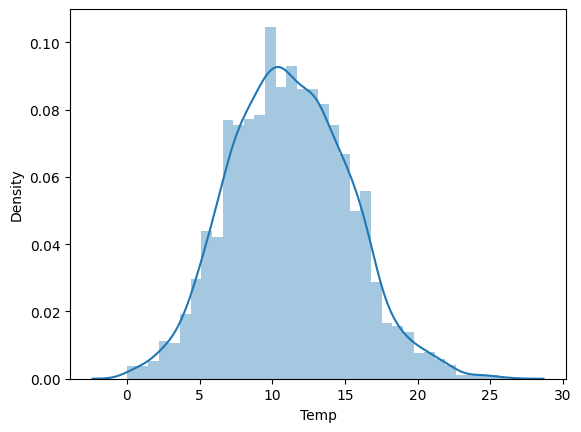

In [20]:
# ploting the distribution of dataset
sns.distplot(df["Temp"])
plt.show()

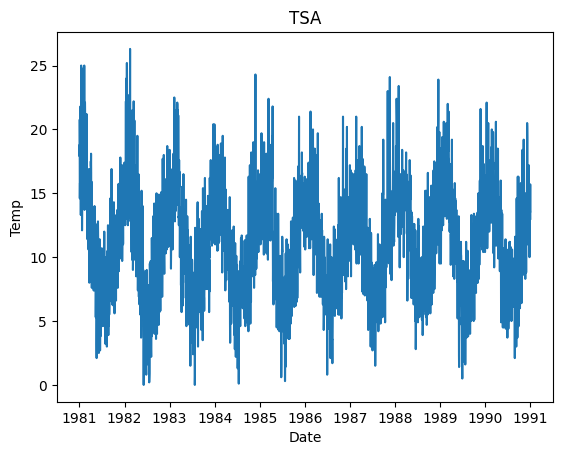

In [21]:
# Just ploting 
plt.plot(df["Date"], df["Temp"])
plt.xlabel("Date")
plt.ylabel("Temp")
plt.title("TSA")
plt.show()

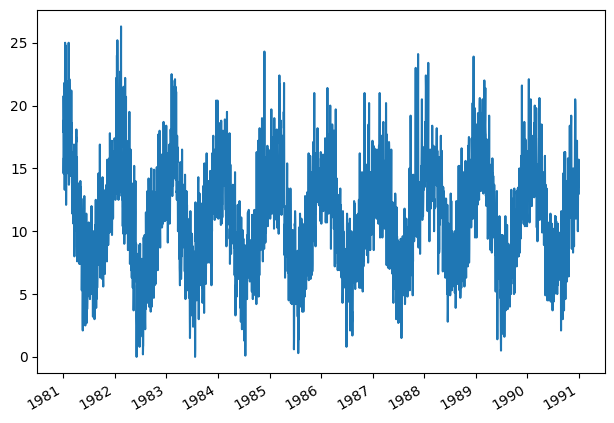

In [22]:
# Add padding for date on x axis
figure , axs = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axs.plot(df["Date"], df["Temp"])
plt.show()

In [23]:
# Setting index

In [24]:
df = df.set_index("Date", drop=True)

In [25]:
# Step-3 Stationarity Chceck

In [26]:
df.head()

,Temp,Year,Month,Day
Date,,,,
1981-01-01,20.7,1981,1,1
1981-01-02,17.9,1981,1,2
1981-01-03,18.8,1981,1,3
1981-01-04,14.6,1981,1,4
1981-01-05,15.8,1981,1,5


In [27]:
import statsmodels.api as sm

In [28]:
tsa_data = df["Temp"].resample("MS").sum()

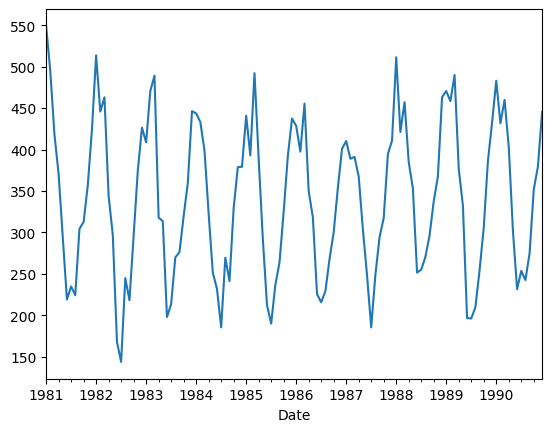

In [29]:
tsa_data.plot()
plt.show()

In [30]:
tsa_data

Date
1981-01-01    549.1
1981-02-01    495.0
1981-03-01    418.5
1981-04-01    370.7
1981-05-01    294.2
              ...  
1990-08-01    242.6
1990-09-01    275.0
1990-10-01    351.7
1990-11-01    379.7
1990-12-01    445.4
Freq: MS, Name: Temp, Length: 120, dtype: float64

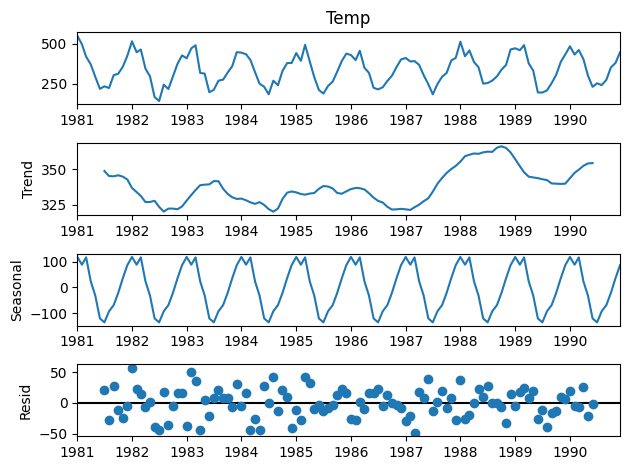

In [31]:
decomposition = sm.tsa.seasonal_decompose(tsa_data, model="additive")
fig = decomposition.plot()
plt.show()

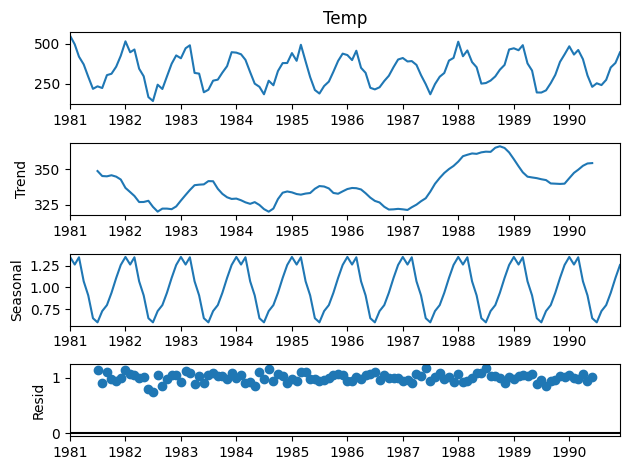

In [32]:
decomposition2 = sm.tsa.seasonal_decompose(tsa_data, model="multiplicative")
fig2 = decomposition2.plot()
plt.show()

In [33]:
# Dickey Fuller test

In [34]:
from statsmodels.tsa.stattools import adfuller

In [35]:
adfuller_result = adfuller(tsa_data)

In [36]:
adfuller_result

(-1.4633650417960353,
 0.5515500760926078,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 1056.441615314655)

In [37]:
p_value = adfuller_result[1]

In [38]:
print("The p value fo adfuller test is:  ", p_value)
print("="*60)
print('The palue is > 0.5 so the dataset is not stationary')

The p value fo adfuller test is:   0.5515500760926078
The palue is > 0.5 so the dataset is not stationary


In [39]:
# Converting Non-Stationary dataset into stationary dataset using Differencing

In [40]:
df["Temp"] = df["Temp"].diff()

In [68]:
df.head()

,Temp,Year,Month,Day
Date,,,,
1981-01-01,NaN,1981,1,1
1981-01-02,-2.8,1981,1,2
1981-01-03,0.9,1981,1,3
1981-01-04,-4.2,1981,1,4
1981-01-05,1.2,1981,1,5


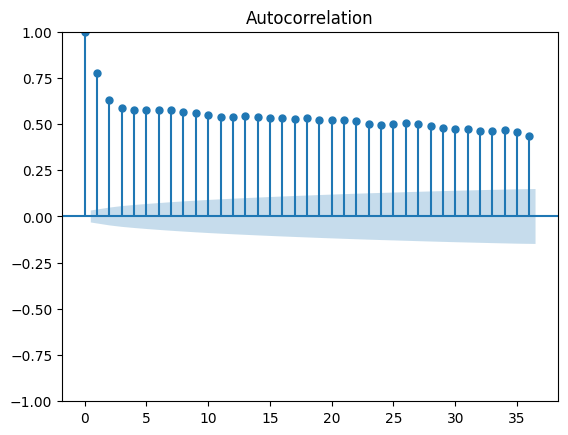

In [52]:
# Ploting acf and pacf plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data["Temp"])
plt.show()

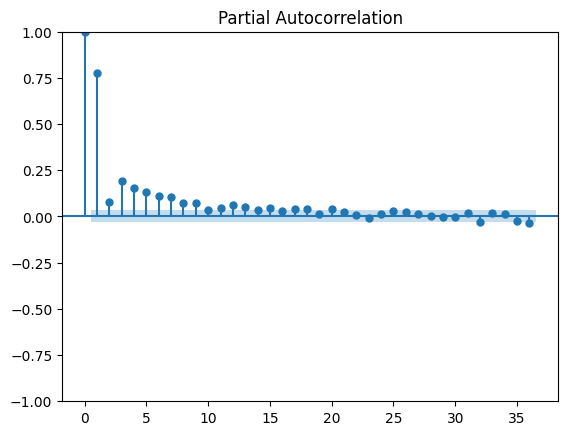

In [53]:
plot_pacf(data["Temp"])
plt.show()

In [41]:
# Step-4 Train Test Split 

In [63]:
train=df.iloc[:int(df.shape[0]*0.80)]
test=df.iloc[int(df.shape[0]*0.80):]

In [64]:
print(train.shape, test.shape)

(2920, 4) (730, 4)


In [42]:
# Step-5
# Model Building

In [55]:
from statsmodels.tsa.arima.model import ARIMA

In [66]:
# fit model
results_ARIMA = ARIMA(train["Temp"], order=(5,0,2))
results_ARIMA = results_ARIMA.fit()
# summary of fit model
print(results_ARIMA.summary())

D:\AIMLDL\venv_ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\AIMLDL\venv_ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\AIMLDL\venv_ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Temp   No. Observations:                 2920
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -6765.424
Date:                Thu, 04 May 2023   AIC                          13548.848
Time:                        20:59:14   BIC                          13602.662
Sample:                             0   HQIC                         13568.231
                               - 2920                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.007     -0.160      0.873      -0.015       0.013
ar.L1         -0.2856      1.073     -0.266      0.790      -2.389       1.817
ar.L2          0.2518      0.523      0.482      0.6

In [67]:
results_ARIMA.forecast(3)

D:\AIMLDL\venv_ai\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2920    0.323234
2921    0.280621
2922    0.058786
Name: predicted_mean, dtype: float64

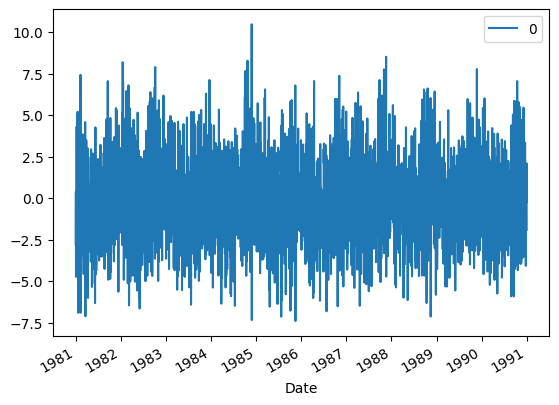

In [61]:
# line plot of residuals
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot()
plt.show()

In [43]:
# Step-6

In [44]:
# Step-7

In [45]:
# Step-8

In [46]:
# Step-9

In [47]:
# Step-10